In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
def color_segmentation(image,masked_color=(0,0,255)):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    lower_yellow = np.array([165, 157, 0], dtype=np.uint8)
    upper_yellow = np.array([255, 255, 155], dtype=np.uint8)

    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create masks for yellow and white regions
    mask_yellow = cv2.inRange(rgb, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(rgb, lower_white, upper_white)

    # Combine masks
    combined_mask = cv2.bitwise_or(mask_yellow, mask_white)
    inverted_mask = cv2.bitwise_not(combined_mask)

    masked_color_image = np.full_like(image, masked_color, dtype=np.uint8)

    # Combine the masked color image with the original image using the inverted mask
    segmented_image = cv2.bitwise_or(cv2.bitwise_and(image, image, mask=inverted_mask), 
                                      cv2.bitwise_and(masked_color_image, masked_color_image, mask=combined_mask))


    return segmented_image

In [ ]:
img=cv2.imread('frame_0035.png')
image=color_segmentation(img)
plt.imshow(image)

In [ ]:
test_kernel = np.array([[0.1,0.1,0.1],
                         [0.1,0.1,0.1],
                         [0.1,0.1,0.1]])
brightening_kernel = np.array([[0.01, 0.01, 0.01],
                               [0.01, 1.0, 0.01],
                               [0.01, 0.01, 0.01]])
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
gaussian_5x5 = (1/256.0)*np.array([[1., 4., 6., 4., 1.],
                                   [4., 16., 24., 16., 4.],
                                   [6., 24., 36., 24., 6.],
                                   [4., 16., 24., 16., 4.],
                                   ])
Laplacian_gaussain = np.array([[0,1,0],
                              [1,-4,1],
                              [0,1,0]])
edge_enhancement = np.array([[-1,-1,-1],
                             [-1,8,-1],
                             [-1,-1,-1]])
canny=np.array([[-1,0 ,1],
[-2 , 0 , 2],
[-1 , 0,  1]])

In [61]:
def kernel_seg(image,kernel):
 brightened=cv2.filter2D(image,-1,kernel)
 image=color_segmentation(brightened)
 return image

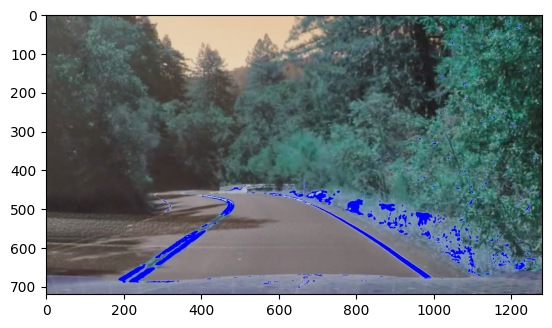

In [62]:
image=kernel_seg(img,test_kernel)
plt.imshow(image)

In [70]:
video = cv2.VideoCapture("videos\project_video.mp4")
while True:
    ret,frame=video.read()
    if not ret:
        break
    image=kernel_seg(frame,test_kernel)
    cv2.imshow("video",image)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [ ]:
kernel_seg(img,test_kernel)

In [ ]:
kernel_seg(img,brightening_kernel)

In [ ]:
kernel_seg(img,gaussian)

In [ ]:
kernel_seg(img,gaussian_5x5)

In [ ]:
kernel_seg(img,Laplacian_gaussain)

In [ ]:
kernel_seg(img,edge_enhancement)

In [ ]:
kernel_seg(img,canny)